In [62]:
import numpy as np
import os
import tarfile
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
#File path
path_to_zip_files='/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/full_data'

In [21]:
files=os.listdir(path_to_zip_files)
print(files)

[]


In [12]:
path_to_unzip_files='/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files'

In [23]:
extension = ".tar"

os.chdir(path_to_zip_files) # change directory from working dir to dir with files

for item in os.listdir(path_to_zip_files): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        tar = tarfile.open(file_name, "r:")
        tar.extractall(path_to_unzip_files+'/'+str(item))
        tar.close()
        #os.remove(file_name) 

In [48]:
def probes_loc_one_file(one_mouse_folder):
    path='/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files/'
    dat=pd.read_csv(path+one_mouse_folder+'/'+'channels.brainLocation.tsv', sep='\t')
    dat['Mouse_Folder'] =str(one_mouse_folder)
    return dat
    

In [51]:
def stack_df_probes_loc(save=False):
    path='/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files'
    folders=os.listdir(path_to_zip_files)
    #folders=folders[0:3]
    total_df=pd.DataFrame()
    for folder in folders:
        df_to_add=probes_loc_one_file(folder)
        total_df= pd.concat([total_df,df_to_add],ignore_index=True)
    if save==True:
        save_path='/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/data_processing_files/'
        total_df.to_csv(save_path+'probes_loc.csv')
    return total_df
        
#total_df=stack_df_probes_loc(True)
total_df=pd.read_csv('/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/data_processing_files/'+'probes_loc.csv')
print(total_df)

       Unnamed: 0  ccf_ap  ccf_dv  ccf_lr allen_ontology  \
0               0  7175.9  2980.6  1460.9            SSs   
1               1  7145.8  2980.6  1471.8            SSs   
2               2  7193.3  2961.8  1461.9            SSs   
3               3  7163.2  2961.8  1472.8            SSs   
4               4  7180.6  2943.0  1473.8            SSs   
...           ...     ...     ...     ...            ...   
34403       34403  2850.6  1446.8  5171.4           root   
34404       34404  2860.8  1427.5  5157.9           root   
34405       34405  2887.0  1427.5  5139.6           root   
34406       34406  2844.7  1408.2  5162.9           root   
34407       34407  2870.9  1408.2  5144.5           root   

                   Mouse_Folder  
0      Lederberg_2017-12-09.tar  
1      Lederberg_2017-12-09.tar  
2      Lederberg_2017-12-09.tar  
3      Lederberg_2017-12-09.tar  
4      Lederberg_2017-12-09.tar  
...                         ...  
34403    Theiler_2017-10-11.tar  
34404  

In [58]:
#Cub-circuits of interest
mid_brain_circuits=['SCs','SCm','MRN','APN','PAG','ZI']
frontal_circuits=['MOs','PL','ILA','ORB','MOp','SSp']

In [98]:
def loc_hist(circuits):
    for circ in circuits:
        sub=total_df[total_df['allen_ontology']==circ]
        pd.DataFrame.hist(sub,column='Mouse_Folder',by='allen_ontology', bins=50,sharex=True)

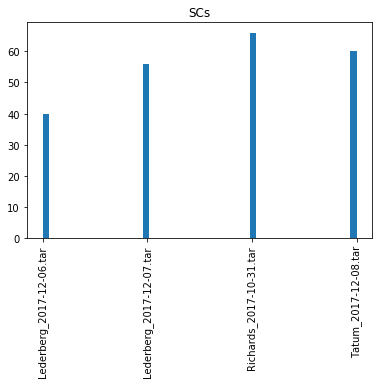

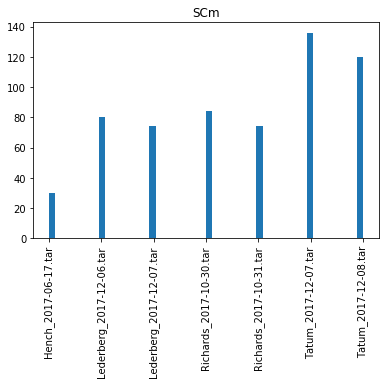

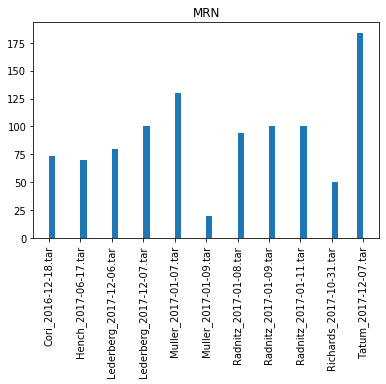

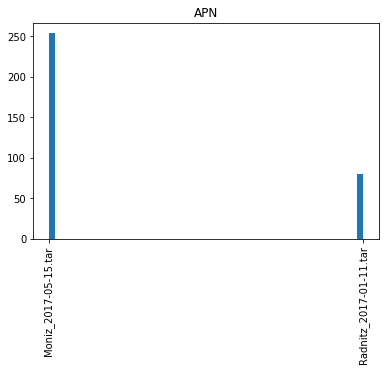

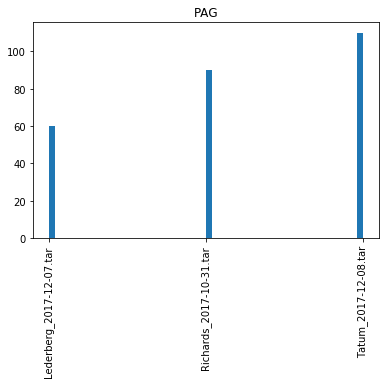

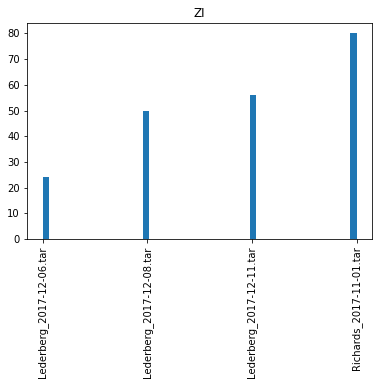

In [99]:
loc_hist(mid_brain_circuits)

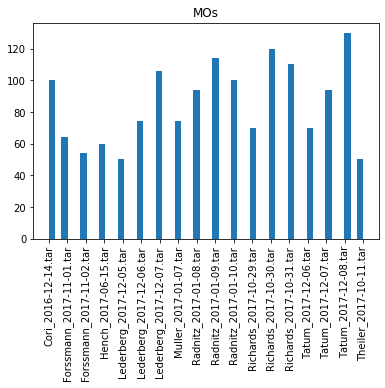

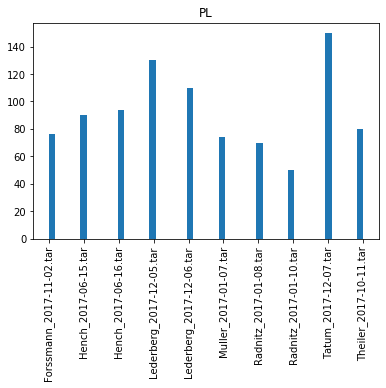

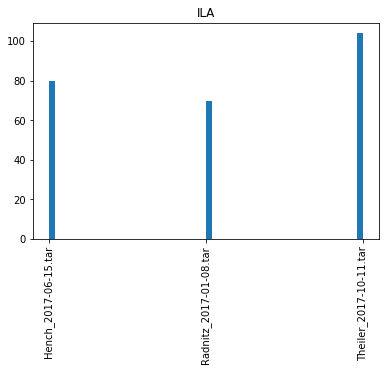

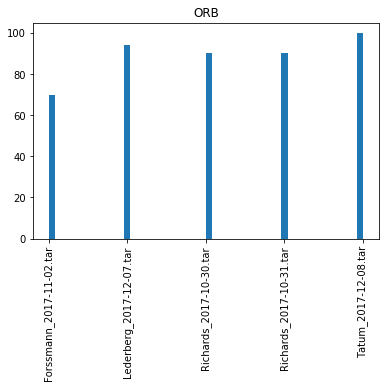

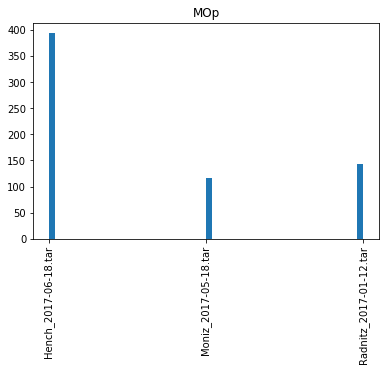

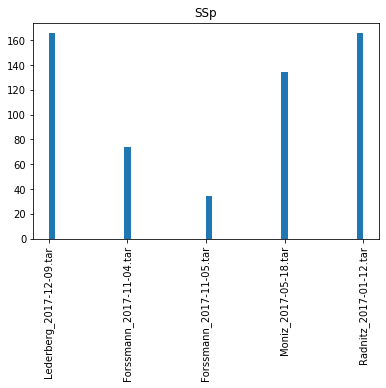

In [100]:
loc_hist(frontal_circuits)